In [2]:
#classification
import pandas as pd
train=pd.read_csv("glass.csv")

In [3]:
train.head()



,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#Hypothesis testing - Silica and sand,Na, and Ca should be most important variable, refractive index of similar type should be near
#what really the value of columns Na, Mg , Al and Si, K, Ca, Ba , Fe
#My intuition says that for every type of glass refractive index will be quite similar so it can be converted into categorical variable
#The numerical values of various elements is not on same scale which can be a problem in some algorithm
train.dtypes



RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
import numpy as np

In [37]:
train.describe()
train.shape

(175, 10)

In [7]:
#univariate analysis
pd.crosstab(index=train['Type'],columns="count")
#classes 2 and 1 are dominating


col_0,count
Type,
1,70
2,76
3,17
5,13
6,9
7,29


In [8]:
# In univariate analysis going one by one from in each variable and looking at the frequency distribution and
# All independent variable is continuous variable.
import matplotlib.pyplot as plt
import sys
sys.path


['',
 'C:\\Users\\hpp\\Anaconda3\\python35.zip',
 'C:\\Users\\hpp\\Anaconda3\\DLLs',
 'C:\\Users\\hpp\\Anaconda3\\lib',
 'C:\\Users\\hpp\\Anaconda3',
 'C:\\Users\\hpp\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\hpp\\Anaconda3\\lib\\site-packages\\Sphinx-1.4.6-py3.5.egg',
 'C:\\Users\\hpp\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\hpp\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\hpp\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\hpp\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.5.egg',
 'C:\\Users\\hpp\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\hpp\\.ipython']

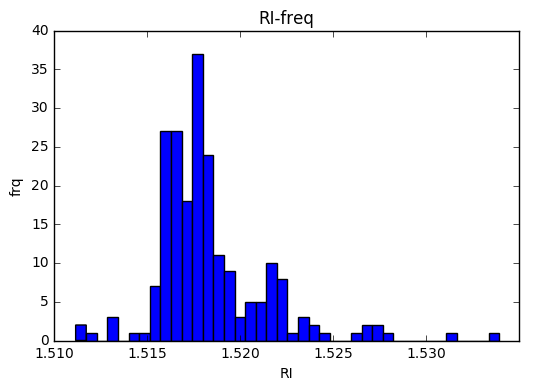

In [14]:
plt.clf()
plt.hist(train['RI'],bins=40)
plt.title("RI-freq")
plt.xlabel("RI")
plt.ylabel("frq")
fig1=plt.gcf()
fig1
#Try different bin size
#the data RI is skewed and a lot of outliers are present 

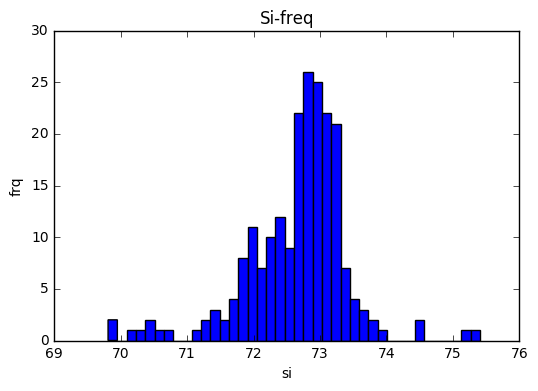

In [13]:
plt.clf()
plt.hist(train['Si'],bins=40)
plt.title("Si-freq")
plt.xlabel("si")
plt.ylabel("frq")
fig1=plt.gcf()
#again lot of outliers 
#here outliers may belong to a particular category which can be seen afterwords
fig1

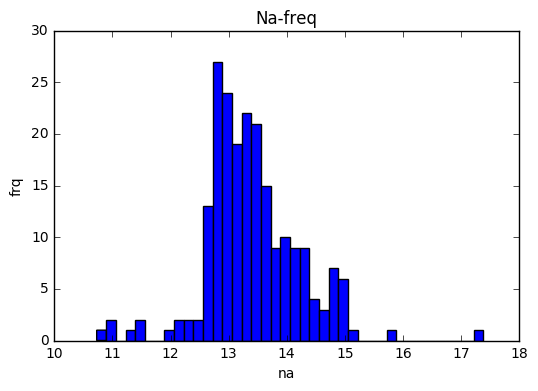

In [15]:
plt.clf()
plt.hist(train['Na'],bins=40)
plt.title("Na-freq")
plt.xlabel("na")
plt.ylabel("frq")
fig1=plt.gcf()
fig1

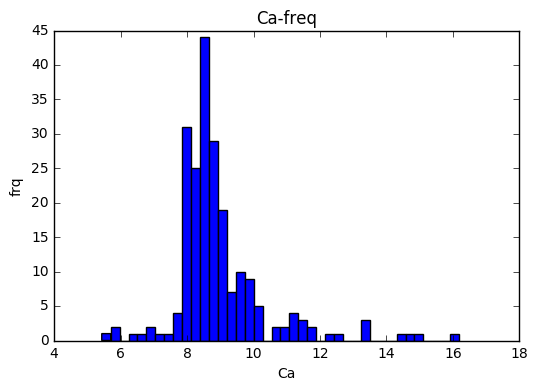

In [16]:
plt.clf()
plt.hist(train['Ca'],bins=40)
plt.title("Ca-freq")
plt.xlabel("Ca")
plt.ylabel("frq")
fig1=plt.gcf()
fig1

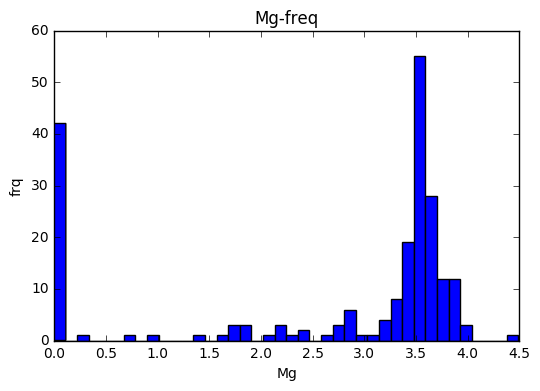

In [17]:
plt.clf()
plt.hist(train['Mg'],bins=40)
plt.title("Mg-freq")
plt.xlabel("Mg")
plt.ylabel("frq")
fig1=plt.gcf()
fig1

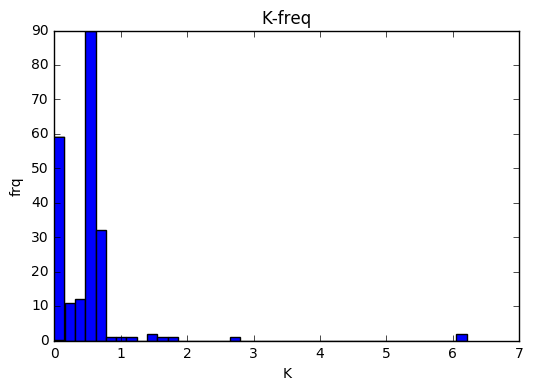

In [18]:
plt.clf()
plt.hist(train['K'],bins=40)
plt.title("K-freq")
plt.xlabel("K")
plt.ylabel("frq")
fig1=plt.gcf()
fig1

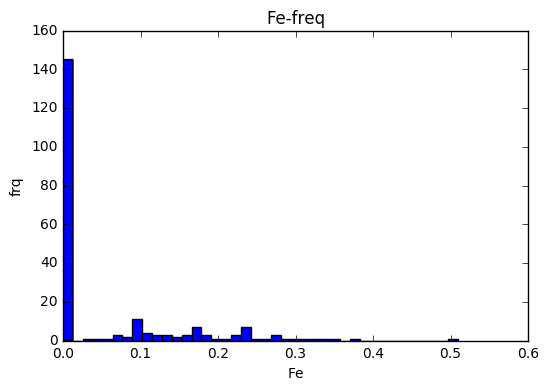

In [19]:
plt.clf()
plt.hist(train['Fe'],bins=40)
plt.title("Fe-freq")
plt.xlabel("Fe")
plt.ylabel("frq")
fig1=plt.gcf()
fig1

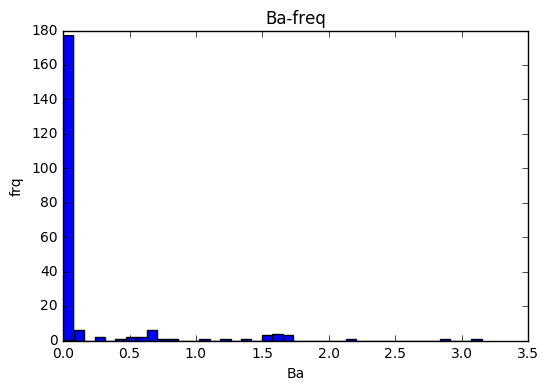

In [20]:
plt.clf()
plt.hist(train['Ba'],bins=40)
plt.title("Ba-freq")
plt.xlabel("Ba")
plt.ylabel("frq")
fig1=plt.gcf()
fig1

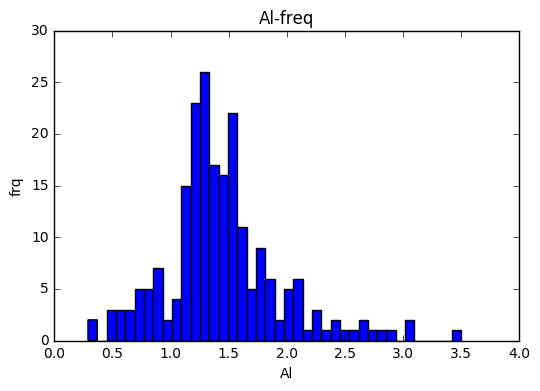

In [22]:
plt.clf()
plt.hist(train['Al'],bins=40)
plt.title("Al-freq")
plt.xlabel("Al")
plt.ylabel("frq")
fig1=plt.gcf()
fig1

In [24]:
#The data is skewed and Fe, Ba , Ca and K are most skewed
#outliers K and Ba has most outliers
#various ways are there to tackle outliers one of them is tukey's HSD.
#as not all variables are on same scale, boxplot may give some intuition

# multivariate analysis

feat=train.columns[:-1].tolist()


In [25]:
corr=train[feat].corr()
corr
#lot of correlation values heatmap can be made to get the better visualisation
#lot of correlation is there and different ways to tackle correlation can be used
#RI is highly correlated with Si, Ca.
#Mg is correlated with Al and Ba


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [26]:
#missing value
train.info()
#No missing value yeah!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [28]:
train[feat].skew()
#Most skewed dataset is fe,Ba,Ca,K,Mg,RI

RI    1.625431
Na    0.454181
Mg   -1.152559
Al    0.907290
Si   -0.730447
K     6.551648
Ca    2.047054
Ba    3.416425
Fe    1.754327
dtype: float64

In [ ]:
# data normalization is important because in SVM distance to classify to normalisation can be considered
#Normalisation and transformation will be useful for reducing skewness in data also
#looking at distribution of each feature w.r.t each type of class can help to get some intution
#to remove correlation we can apply PCA or we can remove one of the feature (preferable PCA so not to lose information)
#feature importance can be calculated with the help of recursive feature elimination

#transformation - http://fmwww.bc.edu/repec/bocode/t/transint.html



In [57]:
# lets go after outliers which can be identified with Tukey's HSD
def outlier(data):
        outlier_index=[]
        for i in data.columns.tolist():
            Q1=np.percentile(data[i],25)
            Q3=np.percentile(data[i],75)
            IQR=Q3-Q1
            outlier_step=1.5*IQR
            outlier_list=data[(data[i]<(Q1-outlier_step))|(data[i]>(Q3+outlier_step))].index
            outlier_index.extend(outlier_list)
            return (outlier_index)
ot=outlier(train[feat])
train.drop(ot,inplace=True)

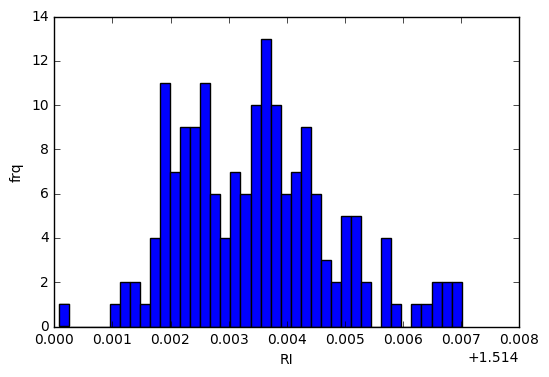

In [42]:
plt.clf()
plt.hist(train['RI'],bins=40)
plt.xlabel('RI')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    
    

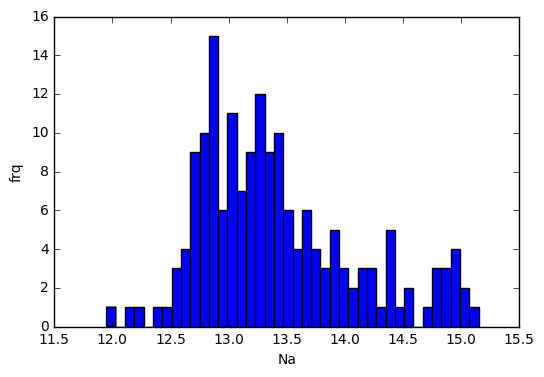

In [43]:
plt.clf()
plt.hist(train['Na'],bins=40)
plt.xlabel('Na')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

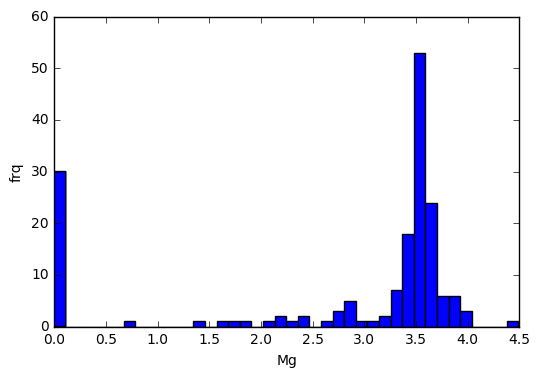

In [45]:
plt.clf()
plt.hist(train['Mg'],bins=40)
plt.xlabel('Mg')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

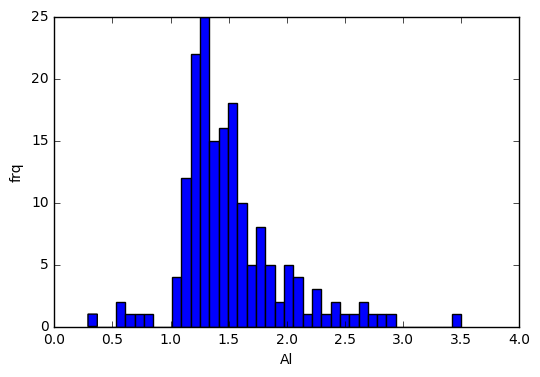

In [46]:
plt.clf()
plt.hist(train['Al'],bins=40)
plt.xlabel('Al')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

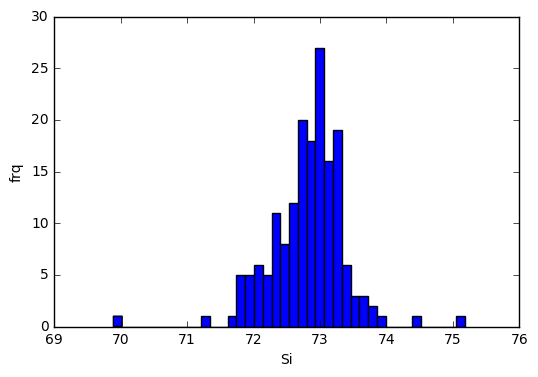

In [47]:
plt.clf()
plt.hist(train['Si'],bins=40)
plt.xlabel('Si')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

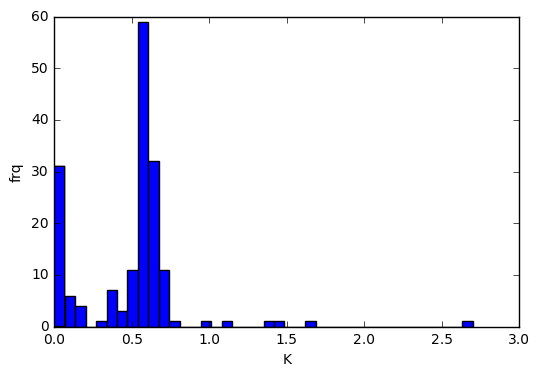

In [48]:
plt.clf()
plt.hist(train['K'],bins=40)
plt.xlabel('K')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

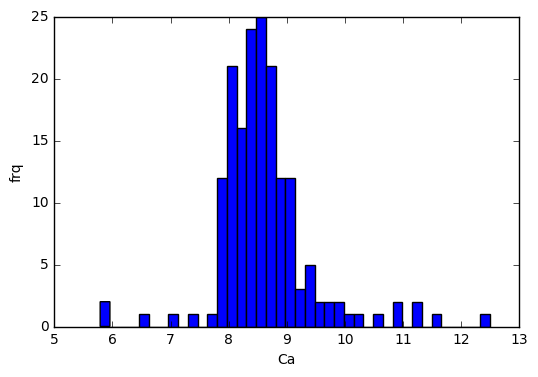

In [49]:
plt.clf()
plt.hist(train['Ca'],bins=40)
plt.xlabel('Ca')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

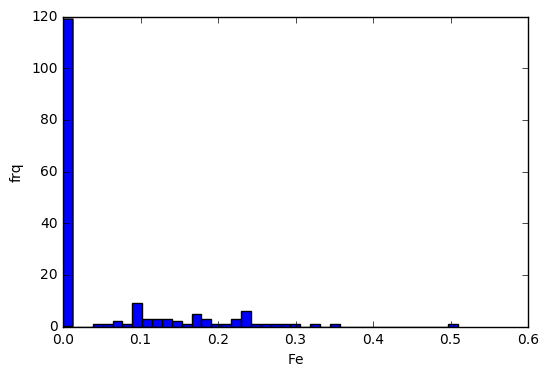

In [50]:
plt.clf()
plt.hist(train['Fe'],bins=40)
plt.xlabel('Fe')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

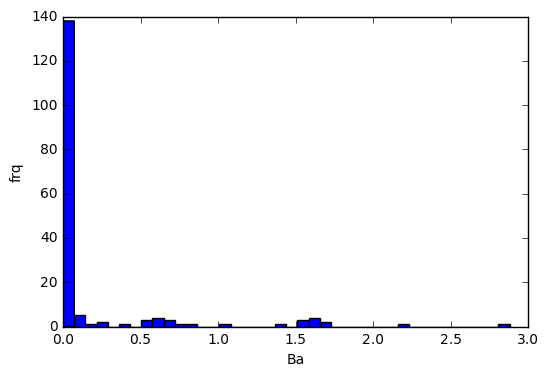

In [51]:
plt.clf()
plt.hist(train['Ba'],bins=40)
plt.xlabel('Ba')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

In [52]:
train[feat].skew()
#skewness is reduced but still skewness can be reduced
#by transformation and normalisation can be done to take all of them on same scal

RI    0.470849
Na    0.769483
Mg   -1.390967
Al    1.198670
Si   -0.560738
K     1.777861
Ca    1.137346
Ba    3.066943
Fe    1.855276
dtype: float64

In [54]:
#  A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution.
# Applying BoxCox transformation
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,1.517474,13.406802,2.791977,1.516047,72.813081,0.484012,8.619651,0.182791,0.053663,2.773256
std,0.001324,0.672000,1.369472,0.442586,0.557500,0.333308,0.813593,0.479453,0.093852,2.116707
min,1.514090,11.950000,0.000000,0.290000,69.890000,0.000000,5.790000,0.000000,0.000000,1.000000
25%,1.516450,12.877500,2.717500,1.250000,72.537500,0.365000,8.210000,0.000000,0.000000,1.000000
50%,1.517490,13.260000,3.480000,1.430000,72.865000,0.570000,8.530000,0.000000,0.000000,2.000000
75%,1.518295,13.735000,3.582500,1.662500,73.110000,0.610000,8.845000,0.000000,0.090000,3.000000
max,1.521010,15.150000,4.490000,3.500000,75.180000,2.700000,12.500000,2.880000,0.510000,7.000000


In [56]:
pd.crosstab(train["Type"],columns="count")

col_0,count
Type,
1,55
2,64
3,14
5,7
6,7
7,25


In [61]:
from scipy.stats import boxcox
features_bc = []

for feature in feat:
    bc_transformed, _ = boxcox(train[feature]+1)  # shift by 1 to avoid computing log of negative values
    features_bc.append(bc_transformed)

features_boxcox = np.column_stack(features_bc)
df_bc = pd.DataFrame(data=features_boxcox, columns=feat)
df_bc['Type'] = train['Type']
df_bc.describe()

C:\Users\hpp\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,1.720000e+02,1.720000e+02,172.000000,172.000000,1.720000e+02,172.000000,172.000000,172.000000,172.000000,138.000000
mean,3.507953e-03,1.697161e-01,15.423279,0.806488,1.009147e+17,0.376867,1.554420,0.023517,0.016929,1.811594
std,1.478820e-17,6.588088e-09,8.266208,0.132788,7.252737e+15,0.220777,0.037008,0.047944,0.025632,0.892391
min,3.507953e-03,1.697161e-01,0.000000,0.246425,6.823150e+16,0.000000,1.390330,0.000000,0.000000,1.000000
25%,3.507953e-03,1.697161e-01,11.654279,0.731420,9.711826e+16,0.313961,1.536844,0.000000,0.000000,NaN
50%,3.507953e-03,1.697161e-01,19.282693,0.793182,1.013635e+17,0.457031,1.552295,0.000000,0.000000,NaN
75%,3.507953e-03,1.697161e-01,20.488781,0.864928,1.046472e+17,0.482876,1.566831,0.000000,0.046975,NaN
max,3.507953e-03,1.697161e-01,33.193077,1.245689,1.364329e+17,1.359280,1.699600,0.130503,0.062953,5.000000


In [65]:
print(df_bc[feat].skew())
print("\n")
print(train[feat].skew())
#boxcox helped a lot in reducing skewness and all the variables are on same scale now so no leverage to any one.


RI    0.000000
Na    0.000000
Mg   -1.002918
Al   -0.035515
Si    0.117081
K     0.007275
Ca   -0.055444
Ba    1.635453
Fe    0.904664
dtype: float64


RI    0.470849
Na    0.769483
Mg   -1.390967
Al    1.198670
Si   -0.560738
K     1.777861
Ca    1.137346
Ba    3.066943
Fe    1.855276
dtype: float64


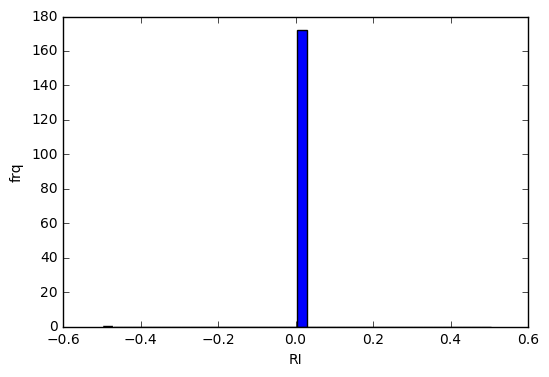

In [66]:
plt.clf()
plt.hist(df_bc['RI'],bins=40)
plt.xlabel('RI')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

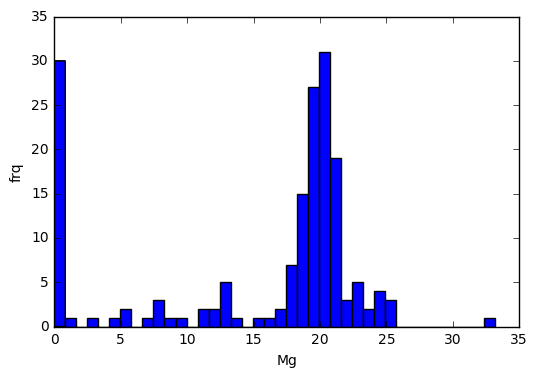

In [68]:
plt.clf()
plt.hist(df_bc['Mg'],bins=40)
plt.xlabel('Mg')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

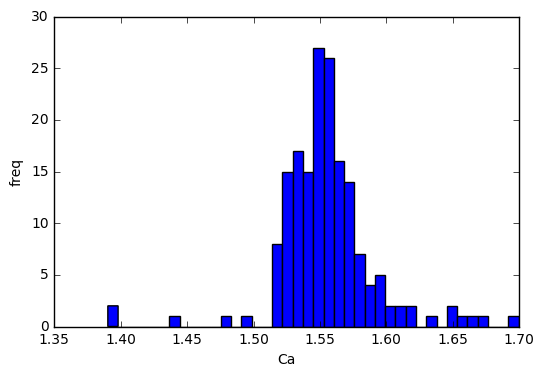

In [69]:
plt.clf()
plt.hist(df_bc['Ca'],bins=40)
plt.xlabel('Ca')
plt.ylabel("freq")
fig1=plt.gcf()
fig1
    

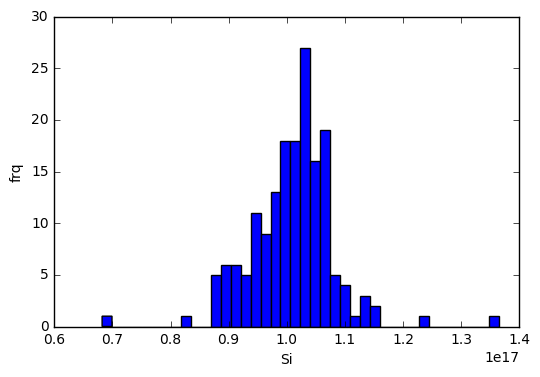

In [70]:
plt.clf()
plt.hist(df_bc['Si'],bins=40)
plt.xlabel('Si')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

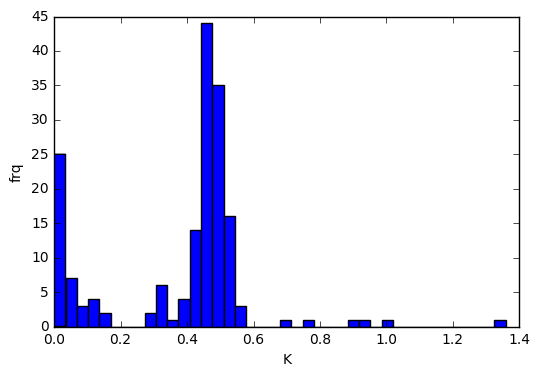

In [71]:
plt.clf()
plt.hist(df_bc['K'],bins=40)
plt.xlabel('K')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

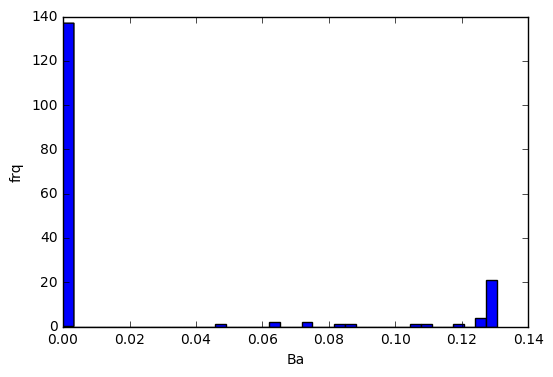

In [72]:
plt.clf()
plt.hist(df_bc['Ba'],bins=40)
plt.xlabel('Ba')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

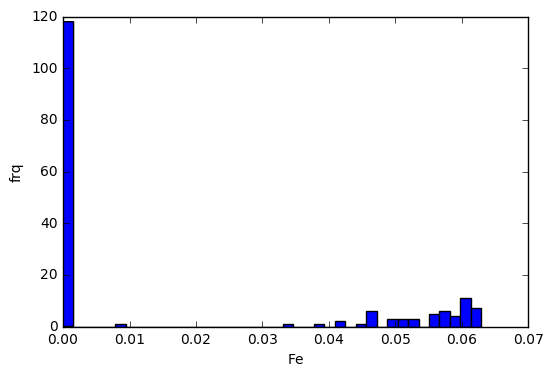

In [73]:
plt.clf()
plt.hist(df_bc['Fe'],bins=40)
plt.xlabel('Fe')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

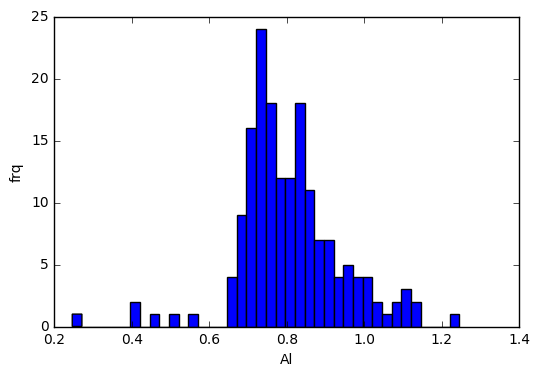

In [74]:
plt.clf()
plt.hist(df_bc['Al'],bins=40)
plt.xlabel('Al')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

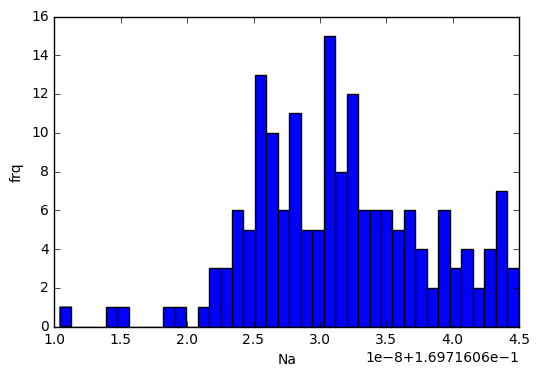

In [75]:
plt.clf()
plt.hist(df_bc['Na'],bins=40)
plt.xlabel('Na')
plt.ylabel("frq")
fig1=plt.gcf()
fig1
    

In [76]:
#feature engineering can be done seeing the multivariate plots or get domain knowledge
#to tackle correlation PCA can be used or using feature importance (RFE) select few of them.
#and then SVM can be applied
